# doc2query - zero shot two stage automatic creation of gold dataset for search evaluation

The advantage of using KeyphraseVectorizers in addition to KeyBERT is that it allows users to get grammatically correct keyphrases instead of simple n-grams of pre-defined lengths. In KeyBERT, users can specify the keyphrase_ngram_range to define the length of the retrieved keyphrases. However, this raises two issues. First, users usually do not know the optimal n-gram range and therefore have to spend some time experimenting until they find a suitable n-gram range. Second, even after finding a good n-gram range, the returned keyphrases are sometimes still grammatically not quite correct or are slightly off-key. Unfortunately, this limits the quality of the returned keyphrases.

To adress this issue, we can use the vectorizers of this package to first extract candidate keyphrases that consist of zero or more adjectives, followed by one or multiple nouns in a pre-processing step instead of simple n-grams. Wan and Xiao successfully used this noun phrase approach for keyphrase extraction during their research in 2008. The extracted candidate keyphrases are subsequently passed to KeyBERT for embedding generation and similarity calculation. To use both packages for keyphrase extraction, we need to pass KeyBERT a keyphrase vectorizer with the vectorizer parameter. Since the length of keyphrases now depends on part-of-speech tags, there is no need to define an n-gram length anymore.

# Table of Contents
1. How does it work?
2. KeyphraseCountVectorizer
3. KeyphraseTfidfVectorizer
4. Multi phrase extraction with KeyBERT

# Benefits
* Extract grammatically accurate keyphases based on their part-of-speech tags.
* No need to specify n-gram ranges.
* Get document-keyphrase matrices.
* Multiple language support.
* User-defined part-of-speech patterns for keyphrase extraction possible.

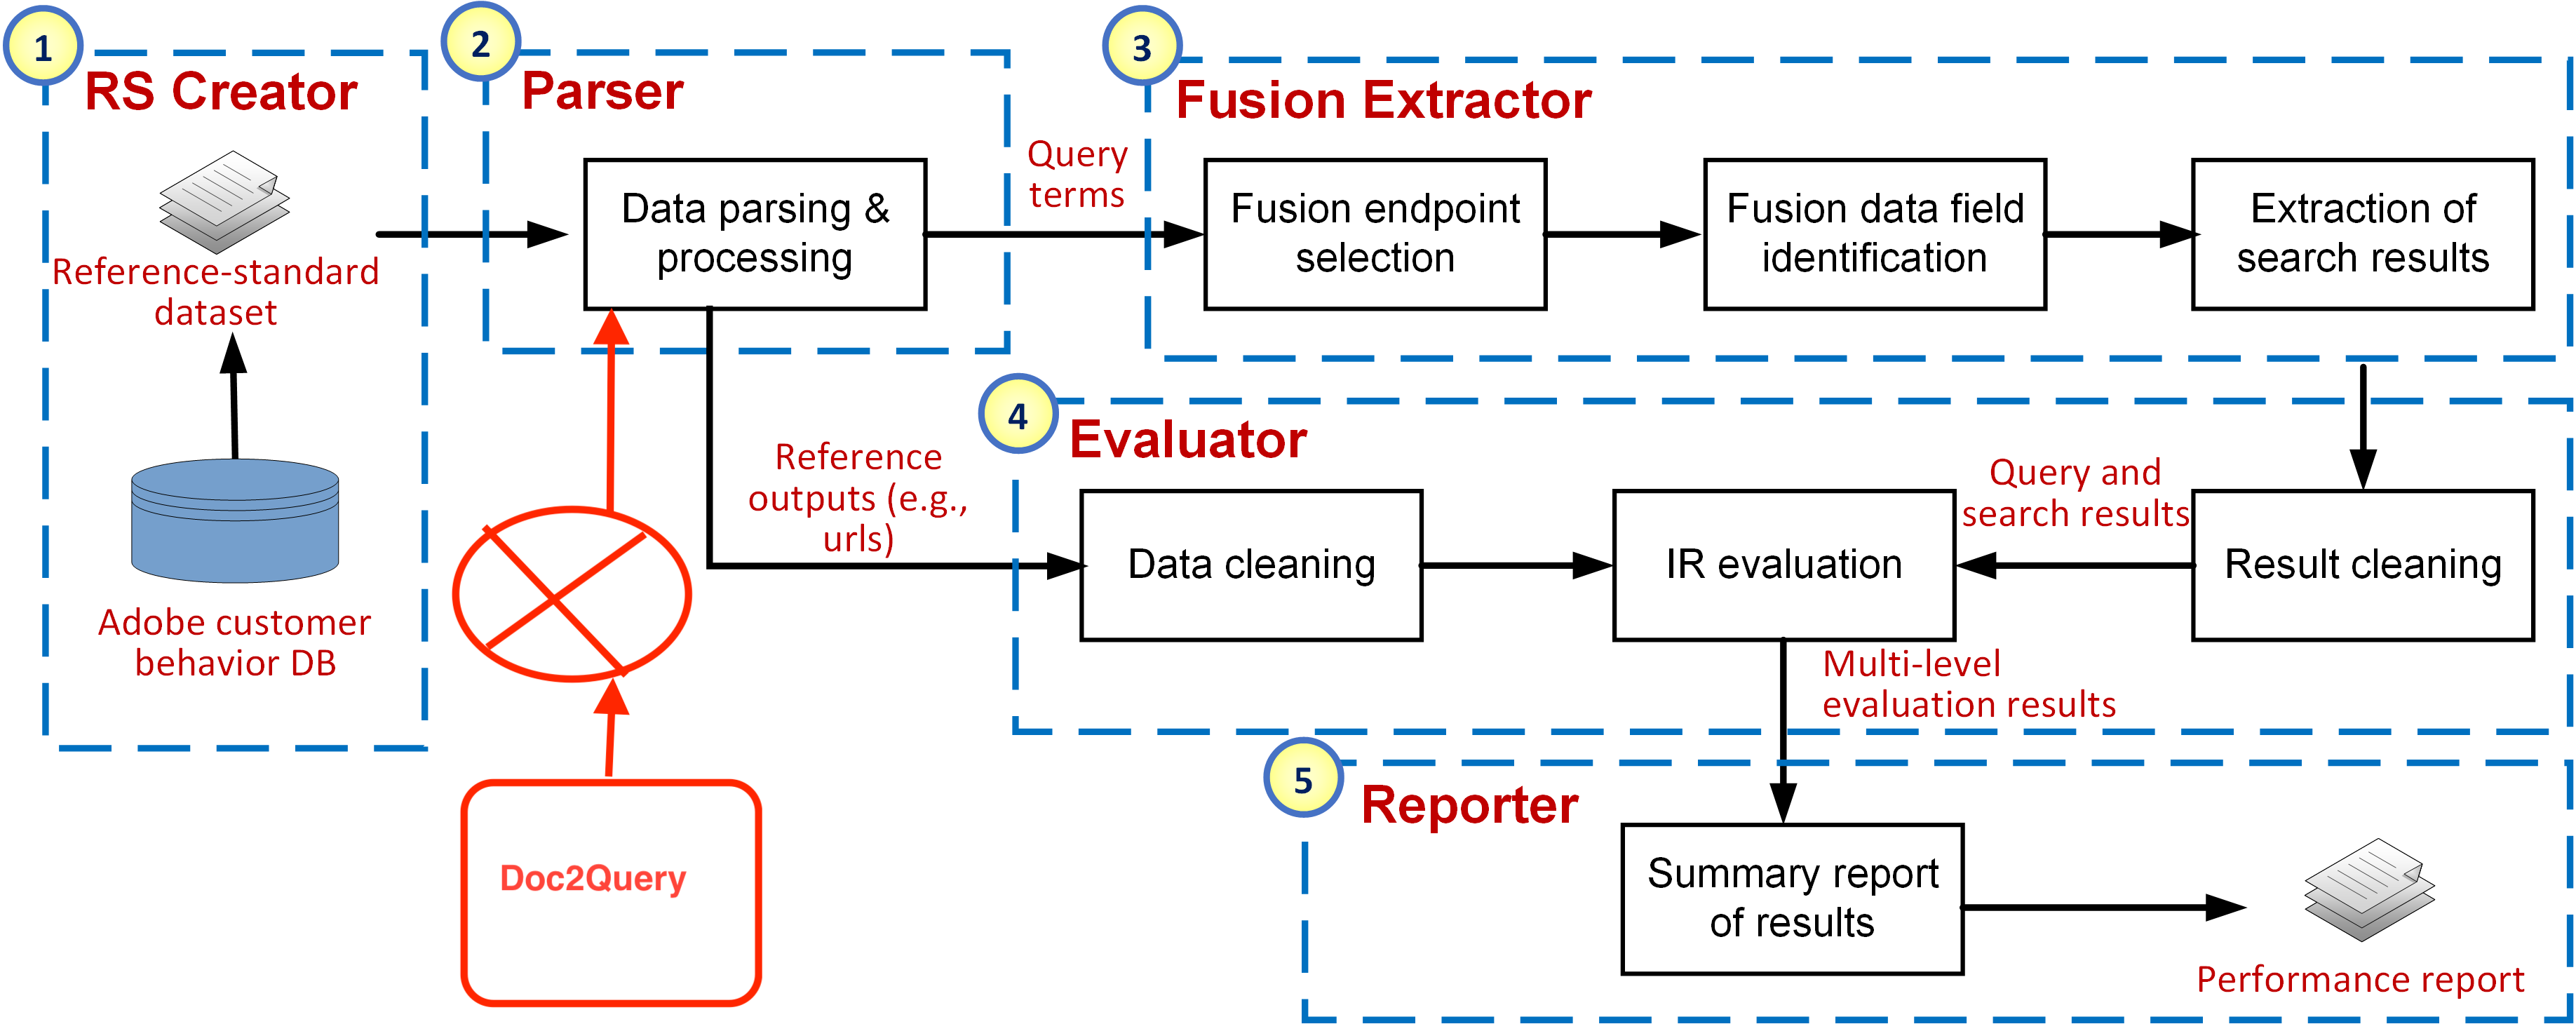

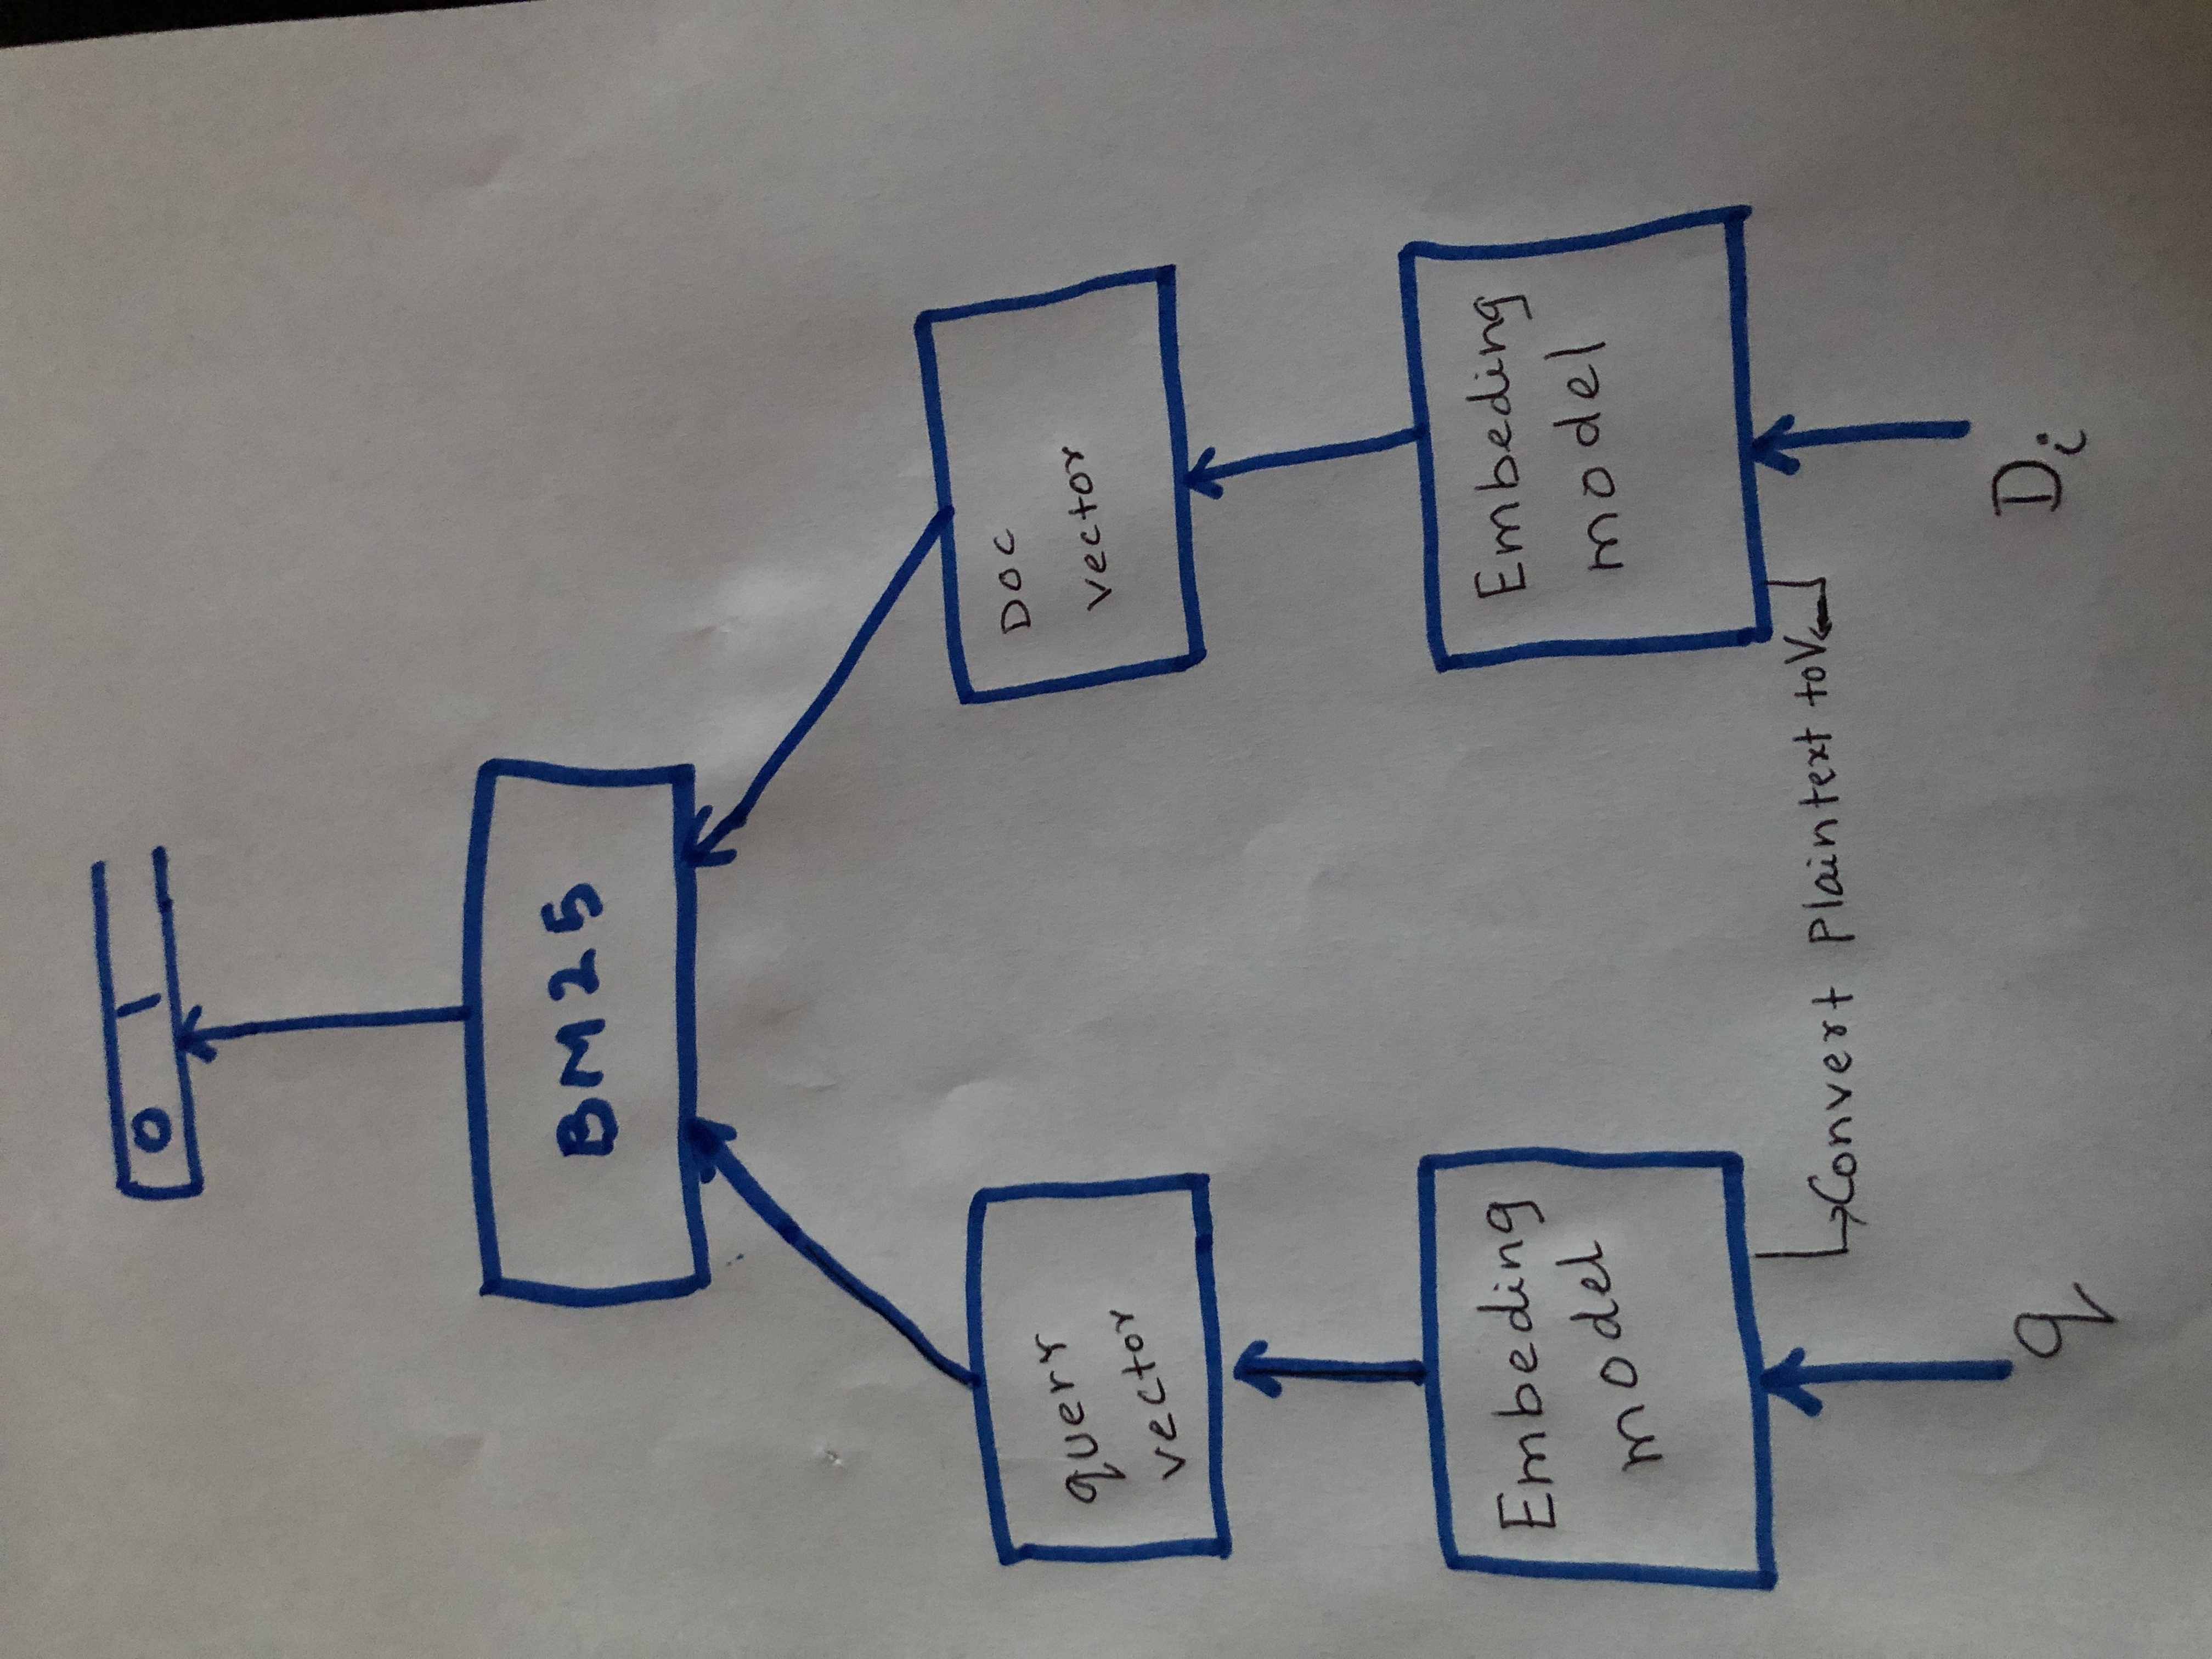

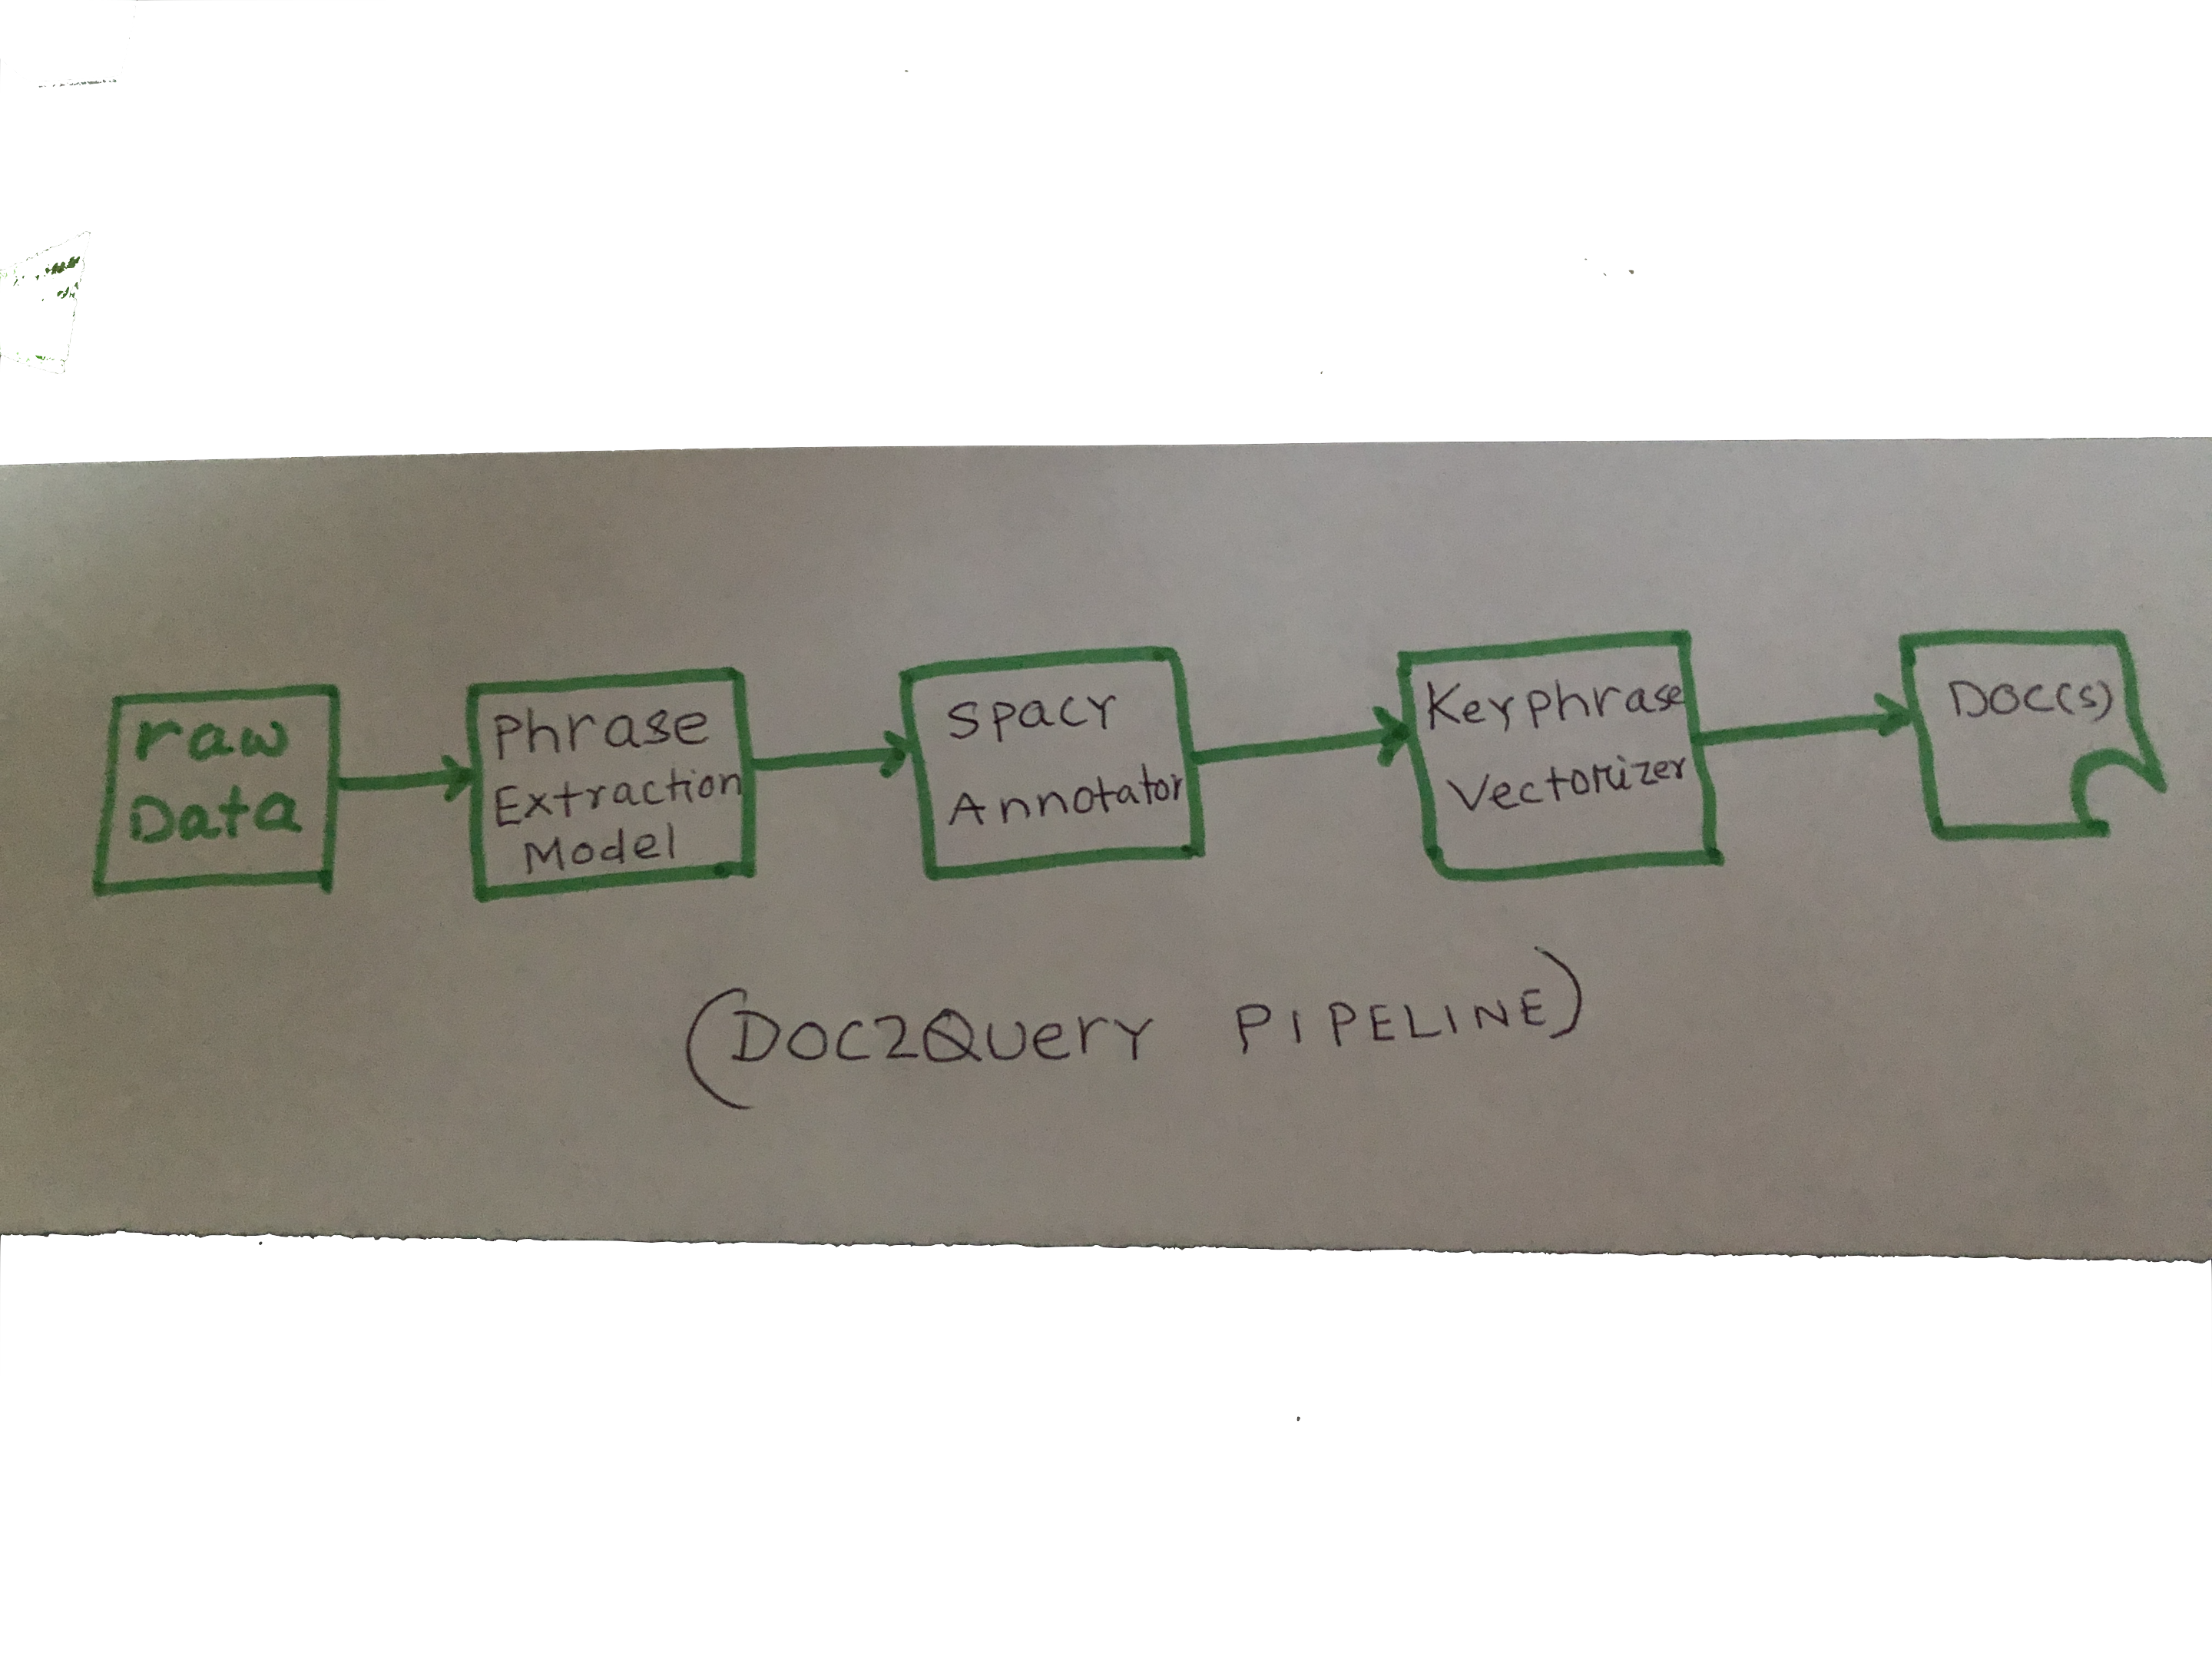

### How does it work?

First, the document texts are annotated with spaCy part-of-speech tags. A list of all possible spaCy part-of-speech tags for different languages is linked here. The annotation requires passing the spaCy pipeline of the corresponding language to the vectorizer with the spacy_pipeline parameter.

Second, words are extracted from the document texts whose part-of-speech tags match the regex pattern defined in the pos_pattern parameter. The keyphrases are a list of unique words extracted from text documents by this method.

Finally, the vectorizers calculate document-keyphrase matrices.

### Multiword phrase extraction with KeyBERT

The keyphrase vectorizers can be used together with KeyBERT to extract grammatically correct keyphrases that are most similar to a document. Thereby, the vectorizer first extracts candidate keyphrases from the text documents, which are subsequently ranked by KeyBERT based on their document similarity. The top-n most similar keyphrases can then be considered as document keywords.

The advantage of using KeyphraseVectorizers in addition to KeyBERT is that it allows users to get grammatically correct keyphrases instead of simple n-grams of pre-defined lengths. In KeyBERT, users can specify the keyphrase_ngram_range to define the length of the retrieved keyphrases. However, this raises two issues. First, users usually do not know the optimal n-gram range and therefore have to spend some time experimenting until they find a suitable n-gram range. Second, even after finding a good n-gram range, the returned keyphrases are sometimes still grammatically not quite correct or are slightly off-key. Unfortunately, this limits the quality of the returned keyphrases.

To adress this issue, we can use the vectorizers of this package to first extract candidate keyphrases that consist of zero or more adjectives, followed by one or multiple nouns in a pre-processing step instead of simple n-grams. Wan and Xiao successfully used this noun phrase approach for keyphrase extraction during their research in 2008. The extracted candidate keyphrases are subsequently passed to KeyBERT for embedding generation and similarity calculation. To use both packages for keyphrase extraction, we need to pass KeyBERT a keyphrase vectorizer with the vectorizer parameter. Since the length of keyphrases now depends on part-of-speech tags, there is no need to define an n-gram length anymore.

In [21]:
threshold=0.95

In [22]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import pandas as pd
import csv
import warnings
warnings.filterwarnings('ignore')
import spacy

In [23]:
from flair.embeddings import TransformerDocumentEmbeddings
roberta = TransformerDocumentEmbeddings('roberta-base')
#nlp = spacy.load("en_core_web_trf", exclude=['tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer'])
#nlp = spacy.load("en_core_web_trf")

In [24]:
#kw_model = KeyBERT(model='all-mpnet-base-v2')
kw_model = KeyBERT(model = roberta)

In [62]:
data = pd.read_excel('./data/MyKP-Tools-List-as-of-060322.xlsx', nrows=10)

In [63]:
data.head(5)

Tool Card Title  \
0                    TIME Entry - HI   
1  HealthConnect - What's New (NCAL)   
2             MAS COVID-19 Resources   
3         SCAL COVID-19 for Managers   
4            TSPMG Ethics Department   

                                         Description  \
0          Timekeeping Information Management System   
1           What's New How To resources and training   
2                 For KPMAS employees and clinicians   
3  KPSC COVID-19 resources for both KFH and SCPMG...   
4                       TSPMG policies and resources   

                    AEM Name  \
0                       time   
1             health-connect   
2    covid-19-sharepoint-mas   
3      covid-19-for-managers   
4  ethics-department---tspmg   

                                                Link  \
0               http://web2.hi.kp.org/fin-home/time/   
1    https://sp-cloud.kp.org/sites/teams-cnkphc-wnht   
2  https://sp-cloud.kp.org/sites/KPMASCOVID-19Res...   
3         https://sp-cloud.kp.org/sites/KPSCCOVID19    
4  http://kpnet.kp.org:81/ga/TSPMG/ethics/index.html   

                                            Category  \
0  kp:mykp/category/tool-and-resource-category/wo...   
1  kp:mykp/category/tool-and-resource-category/cl...   
2  kp:mykp/category/tool-and-resource-category/po...   
3  kp:mykp/category/tool-and-resource-category/wo...   
4  kp:mykp/category/tool-and-resource-category/po...   

                                        Location  \
0               kp:mykp/audience/location/hawaii   
1  kp:mykp/audience/location/california-northern   
2  kp:mykp/audience/location/mid-atlantic-states   
3  kp:mykp/audience/location/california-southern   
4              kp:mykp/audience/location/georgia   

                                              Entity  Function  \
0                                                NaN       NaN   
1                                                NaN       NaN   
2                                                NaN       NaN   
3                                                NaN       NaN   
4  kp:mykp/audience/entity/permanente-medical-groups       NaN   

                                               Level  Union  Tenure  \
0                                                NaN    NaN     NaN   
1                                                NaN    NaN     NaN   
2                                                NaN    NaN     NaN   
3  kp:mykp/audience/level/manager-executive;kp:my...    NaN     NaN   
4                                                NaN    NaN     NaN   

                           Created                    Last modified   Active?  
0   Tue, 8 Dec 2020 19:01:17 +0000  Sun, 13 Dec 2020 17:56:16 +0000  Activate  
1  Mon, 30 Nov 2020 16:03:41 +0000  Sun, 13 Dec 2020 18:18:49 +0000  Activate  
2  Mon, 30 Nov 2020 16:03:40 +0000  Sun, 13 Dec 2020 18:47:23 +0000  Activate  
3  Tue, 17 Nov 2020 19:39:11 +0000  Sun, 13 Dec 2020 18:48:21 +0000  Activate  
4  Mon, 30 Nov 2020 16:03:41 +0000  Sun, 13 Dec 2020 22:20:41 +0000  Activate

In [64]:
text=data['Tool Card Title'] + " " + data['Description'] 

In [65]:
text=text.to_list()

In [66]:
for full_text in text:
    print(full_text)


TIME Entry - HI Timekeeping Information Management System
HealthConnect - What's New (NCAL) What's New How To resources and training
MAS COVID-19 Resources For KPMAS employees and clinicians
SCAL COVID-19 for Managers KPSC COVID-19 resources for both KFH and SCPMG Managers only. 
TSPMG Ethics Department TSPMG policies and resources
National Supplier Diversity Site External site for building economic diversity
Impact Spending Internal site For sound and equitable spending practices
CO Member Communications Announcements and resources
MSSA Marketing, Sales, Service, Administration resources 
The Permanente Federation Internal source for Permanente Medicine


In [67]:
# test synonym and print score, how to find threshold???

In [78]:
phrase_list=[]
vectorizer = KeyphraseCountVectorizer()
vectorizer.set_params(spacy_pipeline='en_core_web_trf')
# Print parameters
print(vectorizer.get_params())
filename='./data/seed_keywords.txt'
with open(filename) as file:
    lines = file.readlines()
    seed_keywords_txt = [line.rstrip() for line in lines]
    print(seed_keywords_txt[0:5])
#seed_keywords_txt=pd.read_csv('./data/seed_keywords.txt', sep=" ")
for full_text in text:
        keywords = kw_model.extract_keywords(full_text, 
                                     keyphrase_ngram_range=(1, 1), 
                                     stop_words='english',
                                     min_df = 1,
                                     highlight=False,
                                     #seed_keywords=seed_keywords_txt,
                                     #vectorizer=vectorizer,
                                     top_n=2)
        
        for keyword in keywords:
            print(keyword)
            if keyword[1]> threshold:
                phrase_list.append(keyword) 


{'binary': False, 'custom_pos_tagger': None, 'dtype': <class 'numpy.int64'>, 'lowercase': True, 'max_df': None, 'min_df': None, 'pos_pattern': '<J.*>*<N.*>+', 'spacy_exclude': None, 'spacy_pipeline': 'en_core_web_trf', 'stop_words': 'english', 'workers': 1}
['KP Learn', 'HR CONNECT', 'my hr', 'service now', 'my pay']
('timekeeping information management', 0.9994)
('hi timekeeping information', 0.9993)
('new resources', 0.9981)
('new resources training', 0.9981)
('kpmas employees clinicians', 0.9988)
('kpmas employees', 0.9987)
('scpmg managers', 0.9981)
('scpmg', 0.998)
('tspmg ethics department', 0.9995)
('tspmg policies', 0.9992)
('diversity site', 0.9994)
('supplier diversity site', 0.9994)
('impact spending internal', 0.9989)
('sound equitable spending', 0.9989)
('member communications announcements', 0.9993)
('communications announcements', 0.9991)
('sales service administration', 0.999)
('sales service', 0.999)
('medicine', 0.9983)
('federation internal source', 0.9982)


In [85]:
keywords_list=[]
for keywords in phrase_list:
    print(keywords)
    keywords_list.append(keywords)

('timekeeping information management', 0.9994)
('hi timekeeping information', 0.9993)
('new resources', 0.9981)
('new resources training', 0.9981)
('kpmas employees clinicians', 0.9988)
('kpmas employees', 0.9987)
('scpmg managers', 0.9981)
('scpmg', 0.998)
('tspmg ethics department', 0.9995)
('tspmg policies', 0.9992)
('diversity site', 0.9994)
('supplier diversity site', 0.9994)
('impact spending internal', 0.9989)
('sound equitable spending', 0.9989)
('member communications announcements', 0.9993)
('communications announcements', 0.9991)
('sales service administration', 0.999)
('sales service', 0.999)
('medicine', 0.9983)
('federation internal source', 0.9982)


In [86]:
fields = ['search_word', 'score']
with open('multiwords_for_testing.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(keywords_list)